### Assignment 2 (Model Interpretation)
#### Anchal Garg (D20003)

### Controlling Overfitting using Regularized Regression 

In [1]:
#The required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 30)

In [2]:
data = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_train_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [3]:
data = data.sort_values(['sqft_living','price'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9761 entries, 8840 to 3303
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long 

For the next section you will be using the housing data that you have used in the previous session

#### 1. Create a basic setup

Write your own function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’. (You may copy and paste the polynomial_dataframe() function created in the previous day)

In [5]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    
    poly_dataframe = pd.DataFrame()
     
    # and set poly_dataframe['power_1'] equal to the passed feature
    
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            
            poly_dataframe[name] = feature.apply(lambda x: x**power)
            
    return poly_dataframe



#### 2. Fitting a Polynomial L2 Regularised Regression Model of Order 15

Generate polynomial features up to degree 15 using `polynomial_dataframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5. Plot the model on the scatter plot



In [6]:
from sklearn.linear_model import Ridge

In [7]:
poly_15 = polynomial_dataframe(data['sqft_living'], 15)
poly_15['price'] = data['price'] # adding price to the data. as it is our target variable

In [8]:
l2_small_penalty = 1.5e-5

In [9]:
#defining dependent (y) and independent (x) variables
X_15 = poly_15.drop(['price'], axis = 1)
y_15 = poly_15[['price']]

In [10]:
#Builiding our model
ridge = Ridge(alpha = l2_small_penalty, normalize=True)

In [11]:
#Fitting our model
ridge.fit(X_15,y_15)

Ridge(alpha=1.5e-05, normalize=True)

In [12]:
print("Coefficients are:",ridge.coef_)  #printing coefficients of ridge regression model

Coefficients are: [[ 1.39848350e+02 -3.80136504e-02  2.09128518e-05 -7.37482644e-10
  -1.78926077e-13 -2.75231014e-18  7.72218148e-22  8.35407120e-26
   4.65969521e-30  9.95679162e-35 -1.11655273e-38 -1.75008085e-42
  -1.46366162e-46 -7.79342734e-51 -3.73777072e-56]]


In [13]:
#predicting using ridge
y_15_pred = ridge.predict(X_15)

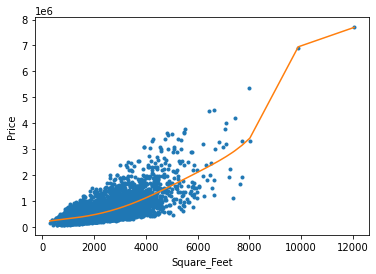

In [18]:
#plotting model on scatter plot
plt.plot(poly_15['power_1'],y_15,'.',
        poly_15['power_1'], y_15_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

### 3. Observe Overfitting

Recall from the last exercise that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. 


In this exercise you will reproduce the same experiment you did in the last class, except this time use a Ridge Regression model instead of OLS regression.




In [15]:
#calling the subset data

set1 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_4_data.csv')

#### 3a. Fit a polynomial of degree 2 (Use L2 Penalty) 

Fit a polynomial regression of order 2. Plot the model on the scatter plot. (Use the l2_small_penalty)

In [19]:
poly_2 = polynomial_dataframe(data['sqft_living'], 2)
poly_2['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_2 = poly_2.drop(['price'], axis = 1)
y_2 = poly_2[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_small_penalty, normalize=True)
ridge.fit(X_2, y_2) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_2_pred = ridge.predict(X_2)

Coefficients are: [[1.26431855 0.05228806]]


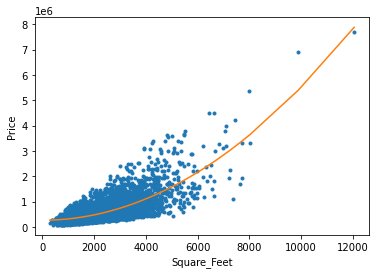

In [20]:
#Plotting model on scatter plot
plt.plot(poly_2['power_1'],y_2,'.',
        poly_2['power_1'], y_2_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### 3b. Fit higher order polynomial fits (Use L2 Penalty)

Fit a polynomial of 3rd degree, 4th degree and 5th degree. Look at the fitted line. Do they appear as you would expect? (Use the l2_small_penalty)

#### Fitting a polynomial of 3rd degree

In [21]:
poly_3 = polynomial_dataframe(data['sqft_living'], 3)
poly_3['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_3 = poly_3.drop(['price'], axis = 1)
y_3 = poly_3[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_small_penalty, normalize=True)
ridge.fit(X_3, y_3) #fitting the model
print("Coefficients are:",ridge.coef_)  #printing coefficients of model

#predicting
y_3_pred = ridge.predict(X_3)


Coefficients are: [[7.77014825e+00 5.02264230e-02 1.73266940e-07]]


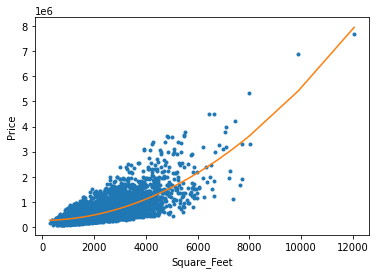

In [22]:
#Plotting model on scatter plot
plt.plot(poly_3['power_1'],y_3,'.',
        poly_3['power_1'], y_3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting a polynomial of 4th degree

In [23]:
poly_4 = polynomial_dataframe(data['sqft_living'], 4)
poly_4['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_4 = poly_4.drop(['price'], axis = 1)
y_4 = poly_4[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_small_penalty, normalize=True)
ridge.fit(X_4, y_4) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_4_pred = ridge.predict(X_4)

Coefficients are: [[-1.27183075e+01  5.97211230e-02 -1.42677593e-06  8.19690466e-11]]


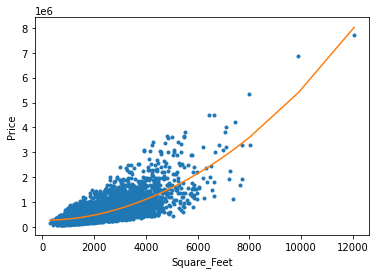

In [24]:
#Plotting model on scatter plot
plt.plot(poly_4['power_1'],y_4,'.',
        poly_4['power_1'], y_4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting a polynomial of 5th degree

In [25]:
poly_5 = polynomial_dataframe(data['sqft_living'], 5)
poly_5['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_5 = poly_5.drop(['price'], axis = 1)
y_5 = poly_5[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_small_penalty, normalize=True)
ridge.fit(X_5, y_5) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_5_pred = ridge.predict(X_5)

Coefficients are: [[-3.07660826e+01  7.15449738e-02 -4.69218442e-06  4.63732984e-10
  -1.52183814e-14]]


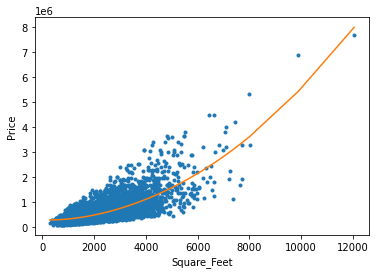

In [26]:
#Plotting model on scatter plot
plt.plot(poly_5['power_1'],y_5,'.',
        poly_5['power_1'], y_5_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [ ]:
## Do they appear as you would expect?

In [ ]:
#### Yes, we get the pretty much same graph for 2, 3, 4, 5 degree polynomial.

#### 3c. Fit a polynomial of order 15 (Use L2 Penalty)

Now try a 15th degree polynomial (Use the L2_small_penalty). Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [27]:
#same function we use in question 2

poly_15 = polynomial_dataframe(data['sqft_living'], 15)
poly_15['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_15 = poly_15.drop(['price'], axis = 1)
y_15 = poly_15[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_small_penalty, normalize=True)
ridge.fit(X_15, y_15) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_15_pred = ridge.predict(X_15)

Coefficients are: [[ 1.39848350e+02 -3.80136504e-02  2.09128518e-05 -7.37482644e-10
  -1.78926077e-13 -2.75231014e-18  7.72218148e-22  8.35407120e-26
   4.65969521e-30  9.95679162e-35 -1.11655273e-38 -1.75008085e-42
  -1.46366162e-46 -7.79342734e-51 -3.73777072e-56]]


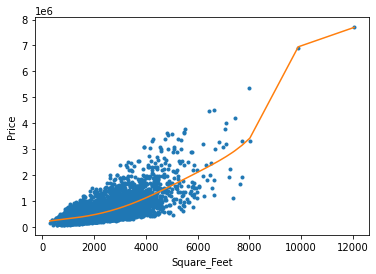

In [37]:
#Plotting model on scatter plot
plt.plot(poly_15['power_1'],y_15,'.',
        poly_15['power_1'], y_15_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### 3d. Explore Overfitting due to High Variance (Due to less penalization)
Estimate a 15th degree polynomial on all 4 subsets of the original sample (provided to you), plot the results and view the coefficients for all four models.

#### Using set 1 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [29]:
subset1 = polynomial_dataframe(set1['sqft_living'], 15)
subset1['price'] = set1['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target1 = subset1.drop(['price'], axis = 1)
y1 = subset1[['price']]

#Builiding our model
ridge1 = Ridge(alpha = l2_small_penalty, normalize=True)
ridge1.fit(target1, y1) #fitting the model
print("Coefficients are:", ridge1.coef_)  #printing coefficients of model

#predicting using ridge1
y1_pred = ridge1.predict(target1)

Coefficients are: [[-1.52107178e+01  4.32261944e-02  7.61301379e-06 -1.01052501e-09
  -3.59830229e-14  2.80067404e-18  3.29599754e-22  1.65500161e-26
   2.77767561e-31 -3.52886683e-35 -4.65374572e-39 -3.49343569e-43
  -1.83615707e-47 -4.56180465e-52  4.50834344e-56]]


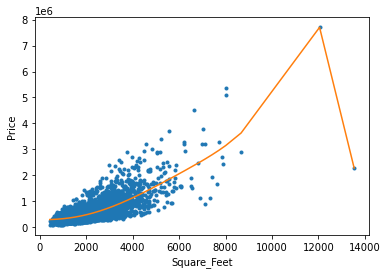

In [38]:
#plotting ridge1 on scatter plot
plt.plot(subset1['power_1'],y1,'.',
        subset1['power_1'], y1_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Using set 2 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [31]:
subset2 = polynomial_dataframe(set2['sqft_living'], 15)
subset2['price'] = set2['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target2 = subset2.drop(['price'], axis = 1)
y2 = subset2[['price']]

#Builiding our model
ridge2 = Ridge(alpha = l2_small_penalty, normalize=True)
ridge2.fit(target2, y2) #fitting the model
print("Coefficients are:", ridge2.coef_)  #printing coefficients of model

#predicting using ridge2
y2_pred = ridge2.predict(target2)

Coefficients are: [[ 2.88185115e+02 -1.00666670e-01  1.96937395e-05  2.73446796e-09
  -2.15126947e-13 -5.51902015e-17 -3.67567745e-21  8.95563520e-26
   4.70553889e-29  5.94657593e-33  4.57207911e-37  1.55980328e-41
  -1.76760271e-45 -4.15664785e-49 -4.60872794e-53]]


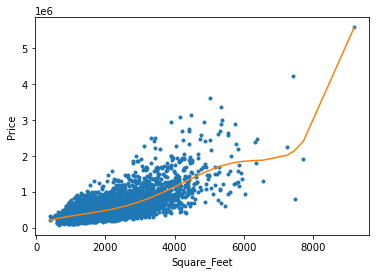

In [39]:
#Plotting ridge2 on scatter plot
plt.plot(subset2['power_1'],y2,'.',
        subset2['power_1'], y2_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Using set 3 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [33]:
subset3 = polynomial_dataframe(set3['sqft_living'], 15)
subset3['price'] = set3['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target3 = subset3.drop(['price'], axis = 1)
y3 = subset3[['price']]

#Builiding our model
ridge3 = Ridge(alpha = l2_small_penalty, normalize=True)
ridge3.fit(target3, y3) #fitting the model
print("Coefficients are:", ridge3.coef_)  #printing coefficients of model

#predicting using ridge3
y3_pred = ridge3.predict(target3)

Coefficients are: [[ 1.87174536e+02 -6.12076951e-02  2.36513260e-05 -1.98609258e-10
  -2.52072849e-13 -1.18384336e-17  9.60893612e-22  1.82218499e-25
   1.27536245e-29  7.23489246e-35 -1.00241945e-37 -1.44889803e-41
  -1.07147764e-45  1.05666483e-50  1.93354431e-53]]


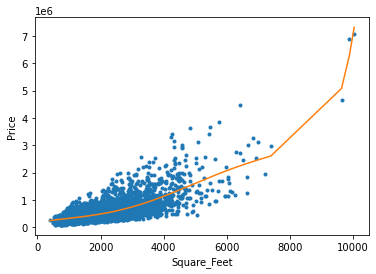

In [40]:
#Plotting ridge3 on scatter plot
plt.plot(subset3['power_1'],y3,'.',
        subset3['power_1'], y3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Using set 4 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [35]:
subset4 = polynomial_dataframe(set4['sqft_living'], 15)
subset4['price'] = set4['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target4 = subset4.drop(['price'], axis = 1)
y4 = subset4[['price']]

#Builiding our model
ridge4 = Ridge(alpha = l2_small_penalty, normalize=True)
ridge4.fit(target4, y4) #fitting the model
print("Coefficients are:", ridge4.coef_)  #printing coefficients of model

#predicting using ridge4
y4_pred = ridge4.predict(target4)

Coefficients are: [[ 1.29005155e+02  2.49560855e-02 -1.32820212e-05  2.00483868e-09
   6.90941111e-13  1.95152690e-17 -1.27723962e-20 -2.49431825e-24
  -2.10624029e-28  4.70950842e-33  4.62967405e-36  8.42370131e-40
   8.51689677e-44  1.12761947e-49 -2.31981126e-51]]


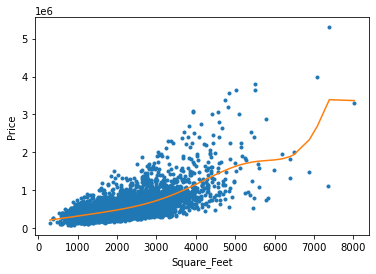

In [41]:
#Plotting ridge4 on scatter plot
plt.plot(subset4['power_1'],y4,'.',
        subset4['power_1'], y4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

What do you observe? Validate your understanding based on the output you got.

All the 5 graphs of 15 degree polynomial model is different due to overfitting. 

### 4. Penalizing the Coefficient to Prevent Overfitting

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)




In [42]:
l2_large_penalty=1.23e2

#### 4a. Repeat steps 3a and 3b (Using large L2 penalty)

#### Repeating Step 3a using Large L2 penalty

In [43]:
poly_2 = polynomial_dataframe(data['sqft_living'], 2)
poly_2['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_2 = poly_2.drop(['price'], axis = 1)
y_2 = poly_2[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_large_penalty, normalize=True)
ridge.fit(X_2, y_2) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_2_pred = ridge.predict(X_2)

Coefficients are: [[2.30877967e+00 4.20326457e-04]]


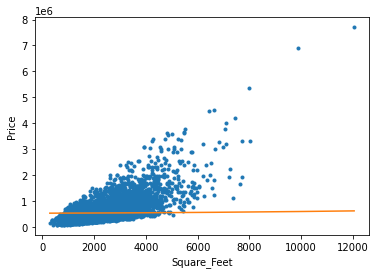

In [44]:
#Plotting model on scatter plot
plt.plot(poly_2['power_1'],y_2,'.',
        poly_2['power_1'], y_2_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Repeating Step 3b using Large L2 penalty

#### Fitting a polynomial of degree 3

In [45]:
poly_3 = polynomial_dataframe(data['sqft_living'], 3)
poly_3['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_3 = poly_3.drop(['price'], axis = 1)
y_3 = poly_3[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_large_penalty, normalize=True)
ridge.fit(X_3, y_3) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_3_pred = ridge.predict(X_3)

Coefficients are: [[2.29531523e+00 4.17489835e-04 6.05375822e-08]]


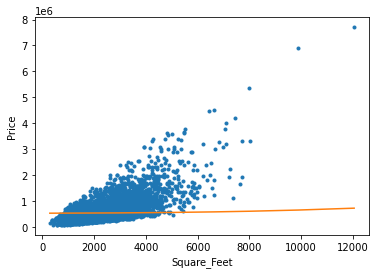

In [46]:
#Plotting model on scatter plot
plt.plot(poly_3['power_1'],y_3,'.',
        poly_3['power_1'], y_3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting a polynomial of degree 4

In [47]:
poly_4 = polynomial_dataframe(data['sqft_living'], 4)
poly_4['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_4 = poly_4.drop(['price'], axis = 1)
y_4 = poly_4[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_large_penalty, normalize=True)
ridge.fit(X_4, y_4) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_4_pred = ridge.predict(X_4)

Coefficients are: [[2.28830819e+00 4.15753462e-04 6.01850617e-08 5.66434141e-12]]


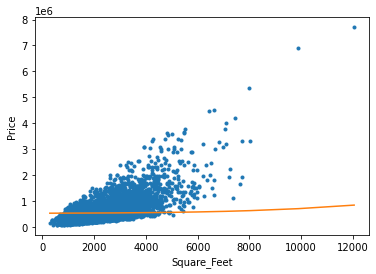

In [48]:
#Plotting model on scatter plot
plt.plot(poly_4['power_1'],y_4,'.',
        poly_4['power_1'], y_4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting a polynomial of degree 5

In [49]:
poly_5 = polynomial_dataframe(data['sqft_living'], 5)
poly_5['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_5 = poly_5.drop(['price'], axis = 1)
y_5 = poly_5[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_large_penalty, normalize=True)
ridge.fit(X_5, y_5) #fitting the model
print("Coefficients are:",ridge.coef_)  #printing coefficients of model

#predicting
y_5_pred = ridge.predict(X_5)

Coefficients are: [[2.28496718e+00 4.14783141e-04 5.99577607e-08 5.63169797e-12
  4.12785526e-16]]


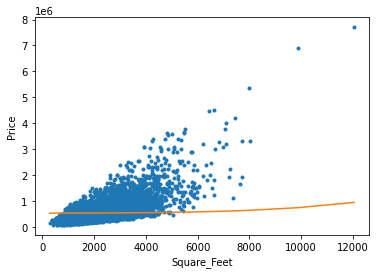

In [50]:
#Plotting model on scatter plot
plt.plot(poly_5['power_1'],y_5,'.',
        poly_5['power_1'], y_5_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### 4b. Fit a polynomial of order 15 (Using large L2 penalty)

In [51]:
poly_15 = polynomial_dataframe(data['sqft_living'], 15)
poly_15['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_15 = poly_15.drop(['price'], axis = 1)
y_15 = poly_15[['price']]

#Builiding our model
ridge = Ridge(alpha = l2_large_penalty, normalize=True)
ridge.fit(X_15, y_15) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_15_pred = ridge.predict(X_15)

Coefficients are: [[2.27737290e+00 4.11842226e-04 5.90996729e-08 5.48865738e-12
  3.96856366e-16 2.75801973e-20 1.98533132e-24 1.48910610e-28
  1.15192350e-32 9.09837241e-37 7.28593916e-41 5.88870826e-45
  4.78983119e-49 3.91368907e-53 3.20842694e-57]]


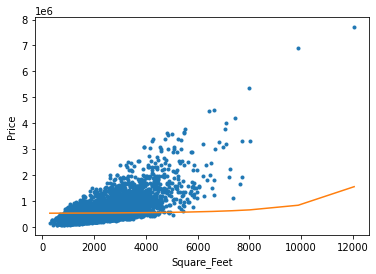

In [52]:
#Plotting model on scatter plot
plt.plot(poly_15['power_1'],y_15,'.',
        poly_15['power_1'], y_15_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### 4c. Overfitting or Not?

Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. These curves should vary a lot less, now that you introduced regularization.

#### Fitting 15th order polynomial model on set 1, with large l2 penalty

In [53]:
subset1 = polynomial_dataframe(set1['sqft_living'], 15)
subset1['price'] = set1['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target1 = subset1.drop(['price'], axis = 1)
y1 = subset1[['price']]

#Builiding our model
ridge1 = Ridge(alpha = l2_large_penalty, normalize=True) #using l2_large_penalty as value of alpha
ridge1.fit(target1, y1) #fitting the model
print("Coefficients are:", ridge1.coef_)  #printing coefficients of model

#predicting using ridge1
y1_pred = ridge1.predict(target1)

Coefficients are: [[2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
  1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
  1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
  4.09542560e-50 2.85464889e-54 1.99547476e-58]]


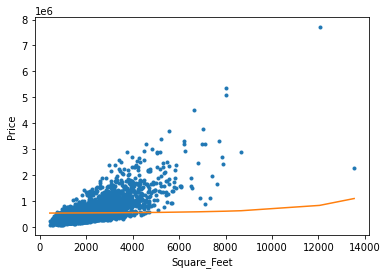

In [54]:
#plotting ridge1 on scatter plot
plt.plot(subset1['power_1'],y1,'.',
        subset1['power_1'], y1_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting 15th order polynomial model on set 2, with large l2 penalty

In [55]:
subset2 = polynomial_dataframe(set2['sqft_living'], 15)
subset2['price'] = set2['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target2 = subset2.drop(['price'], axis = 1)
y2 = subset2[['price']]

#Builiding our model
ridge2 = Ridge(alpha = l2_large_penalty, normalize=True) #using l2_large_penalty as value of alpha
ridge2.fit(target2, y2) #fitting the model
print("Coefficients are:", ridge2.coef_)  #printing coefficients of model

#predicting using ridge2
y2_pred = ridge2.predict(target2)

Coefficients are: [[2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
  9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
  9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
  1.15453748e-47 1.23211305e-51 1.31986696e-55]]


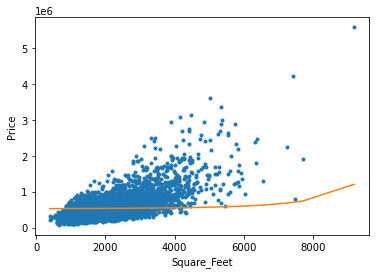

In [56]:
#plotting ridge2 on scatter plot
plt.plot(subset2['power_1'],y2,'.',
        subset2['power_1'], y2_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting 15th order polynomial model on set 3, with large l2 penalty

In [57]:
subset3 = polynomial_dataframe(set3['sqft_living'], 15)
subset3['price'] = set3['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target3 = subset3.drop(['price'], axis = 1)
y3 = subset3[['price']]

#Builiding our model
ridge3 = Ridge(alpha = l2_large_penalty, normalize=True) #using l2_large_penalty as value of alpha
ridge3.fit(target3, y3) #fitting the model
print("Coefficients are:", ridge3.coef_)  #printing coefficients of model

#predicting using ridge3
y3_pred = ridge3.predict(target3)

Coefficients are: [[2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
  6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
  4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
  4.84635021e-48 4.85883628e-52 4.87558469e-56]]


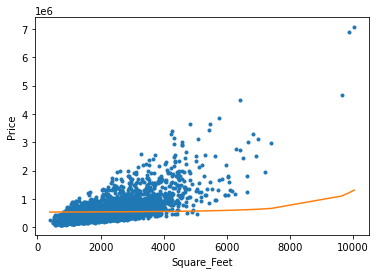

In [58]:
#plotting ridge3 on scatter plot
plt.plot(subset3['power_1'],y3,'.',
        subset3['power_1'], y3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting 15th order polynomial model on set 4, with large l2 penalty

In [59]:
subset4 = polynomial_dataframe(set4['sqft_living'], 15)
subset4['price'] = set4['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target4 = subset4.drop(['price'], axis = 1)
y4 = subset4[['price']]

#Builiding our model
ridge4 = Ridge(alpha = l2_large_penalty, normalize=True) #using l2_large_penalty as value of alpha
ridge4.fit(target4, y4) #fitting the model
print("Coefficients are:", ridge4.coef_)  #printing coefficients of model

#predicting using ridge4
y4_pred = ridge4.predict(target4)

Coefficients are: [[2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
  1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
  2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
  5.67212304e-47 6.85958087e-51 8.30843630e-55]]


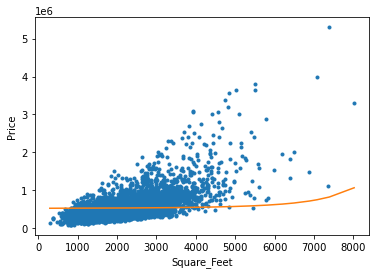

In [60]:
#plotting ridge4 on scatter plot
plt.plot(subset4['power_1'],y4,'.',
        subset4['power_1'], y4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### 4d. Controlling overfitting

Select the best alpha value for the 15th-order polynomial model. Re-fit the model on the data. Print the estimated coefficients and plot the model on the scatter plot

In [61]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [62]:
#Grid for alphas
alphas = 10**np.linspace(10,-2,100)
alphas[0:5]

array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09])

In [63]:
#Using ridgeCV to select the best value for 15th order polynomial model

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_15, y_15)  #using x and y same, we defined for 15th order polynomial
ridgecv.alpha_

0.12328467394420634

#### Keeping L2penalty as 0.12328467394420634, we got from cross validation and fitting the 15th order polynomial model

In [64]:
L2penalty = 0.12328467394420634

In [65]:
poly_15 = polynomial_dataframe(data['sqft_living'], 15)
poly_15['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_15 = poly_15.drop(['price'], axis = 1)
y_15 = poly_15[['price']]

#Builiding our model
ridge = Ridge(alpha = L2penalty, normalize=True)
ridge.fit(X_15, y_15) #fitting the model
print("Estimated Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_15_pred = ridge.predict(X_15)

Estimated Coefficients are: [[ 1.03497987e+02  1.79366455e-02  2.00401917e-06  1.13634497e-10
   3.79862375e-15  8.10241377e-20 -6.44662749e-25 -3.16265396e-28
  -4.14610141e-32 -4.67457102e-36 -4.92767599e-40 -4.94253974e-44
  -4.76363741e-48 -4.44814223e-52 -4.05172079e-56]]


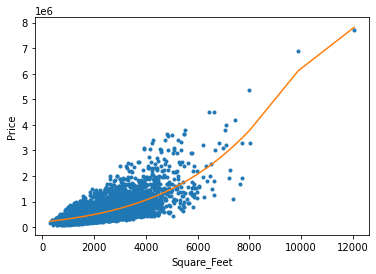

In [66]:
#Plotting model on scatter plot
plt.plot(poly_15['power_1'],y_15,'.',
        poly_15['power_1'], y_15_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

### 5. Selecting an L2 penalty via cross-validation

Repeat step 4 but this time using L2 Penalty.

In [69]:
#Using ridgeCV to select the best value for 2nd order polynomial model

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_2, y_2)  #using x and y same, we defined for 2nd order polynomial
ridgecv.alpha_

0.01

#### Fitting polynomial model of order 2 using alpha = 0.01 we got from cross validation

In [70]:
poly_2 = polynomial_dataframe(data['sqft_living'], 2)
poly_2['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_2 = poly_2.drop(['price'], axis = 1)
y_2 = poly_2[['price']]

#Builiding our model
ridge = Ridge(alpha = 0.01, normalize=True)
ridge.fit(X_2, y_2) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_2_pred = ridge.predict(X_2)

Coefficients are: [[22.53477698  0.04837633]]


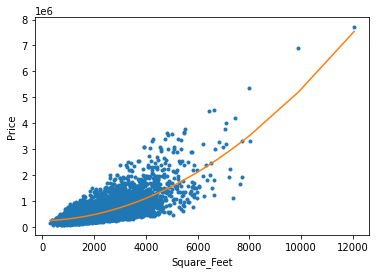

In [71]:
#Plotting model on scatter plot
plt.plot(poly_2['power_1'],y_2,'.',
        poly_2['power_1'], y_2_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [72]:
#Using ridgeCV to select the best value for 3rd order polynomial model

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_3, y_3)  #using x and y same, we defined for 3rd order polynomial
ridgecv.alpha_

0.01

#### Fitting polynomial model of order 3 using alpha = 0.01 we got from cross validation

In [73]:
poly_3 = polynomial_dataframe(data['sqft_living'], 3)
poly_3['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_3 = poly_3.drop(['price'], axis = 1)
y_3 = poly_3[['price']]

#Builiding our model
ridge = Ridge(alpha = 0.01, normalize=True)
ridge.fit(X_3, y_3) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_3_pred = ridge.predict(X_3)

Coefficients are: [[7.29670813e+01 3.05531507e-02 1.68860628e-06]]


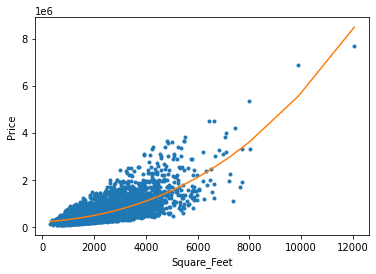

In [74]:
#Plotting model on scatter plot
plt.plot(poly_3['power_1'],y_3,'.',
        poly_3['power_1'], y_3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [75]:
#Using ridgeCV to select the best value for 4th order polynomial model

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_4, y_4)  #using x and y same, we defined for 4th order polynomial
ridgecv.alpha_

0.01

#### Fitting polynomial model of order 4 using alpha = 0.01 we got from cross validation

In [76]:
poly_4 = polynomial_dataframe(data['sqft_living'], 4)
poly_4['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_4 = poly_4.drop(['price'], axis = 1)
y_4 = poly_4[['price']]

#Builiding our model
ridge = Ridge(alpha = 0.01, normalize=True)
ridge.fit(X_4, y_4) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_4_pred = ridge.predict(X_4)

Coefficients are: [[ 7.19963393e+01  2.75856541e-02  2.78582294e-06 -8.45329233e-11]]


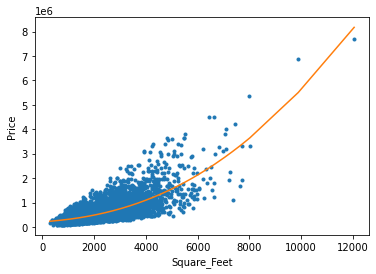

In [77]:
#Plotting model on scatter plot
plt.plot(poly_4['power_1'],y_4,'.',
        poly_4['power_1'], y_4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [78]:
#Using ridgeCV to select the best value for 5th order polynomial model

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_5, y_5)  #using x and y same, we defined for 5th order polynomial
ridgecv.alpha_

0.01

#### Fitting polynomial model of order 5 using alpha = 0.01 we got from cross validation

In [79]:
poly_5 = polynomial_dataframe(data['sqft_living'], 5)
poly_5['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_5 = poly_5.drop(['price'], axis = 1)
y_5 = poly_5[['price']]

#Builiding our model
ridge = Ridge(alpha = 0.01, normalize=True)
ridge.fit(X_5, y_5) #fitting the model
print("Coefficients are:", ridge.coef_)  #printing coefficients of model

#predicting
y_5_pred = ridge.predict(X_5)

Coefficients are: [[ 7.82967275e+01  2.51957716e-02  2.64934055e-06  4.66374753e-11
  -9.57609718e-15]]


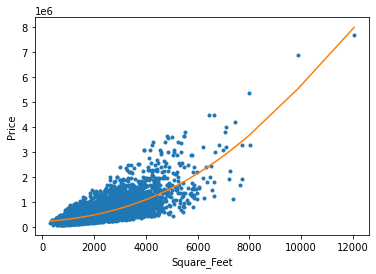

In [80]:
#Plotting model on scatter plot
plt.plot(poly_5['power_1'],y_5,'.',
        poly_5['power_1'], y_5_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [81]:
#Using ridgeCV to select the best value for 15th order polynomial model, set1

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(target1, y1)  #using x and y same, we defined for 15th order polynomial
ridgecv.alpha_

0.0932603346883218

#### Fitting 15th order polynomial model on set 1, with l2 penalty = 0.0932603346883218

In [82]:
subset1 = polynomial_dataframe(set1['sqft_living'], 15)
subset1['price'] = set1['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target1 = subset1.drop(['price'], axis = 1)
y1 = subset1[['price']]

#Builiding our model
ridge1 = Ridge(alpha = 0.0932603346883218, normalize=True) 
ridge1.fit(target1, y1) #fitting the model
print("Coefficients are:", ridge1.coef_)  #printing coefficients of model

#predicting
y1_pred = ridge1.predict(target1)

Coefficients are: [[ 1.19292730e+02  1.89649590e-02  1.46387733e-06  6.12921311e-11
   2.19808849e-15  7.54500589e-20  1.34187151e-24 -1.80042035e-28
  -3.38084550e-32 -4.00475885e-36 -4.03916794e-40 -3.74025566e-44
  -3.28255427e-48 -2.77684669e-52 -2.28738532e-56]]


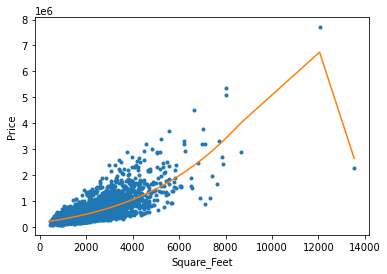

In [83]:
#plotting ridge4 on scatter plot
plt.plot(subset1['power_1'],y1,'.',
        subset1['power_1'], y1_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [84]:
#Using ridgeCV to select the best value for 15th order polynomial model, set2

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(target2, y2)  #using x and y same, we defined for 15th order polynomial
ridgecv.alpha_

0.01

#### Fitting 15th order polynomial model on set 2, with l2 penalty = 0.01

In [85]:
subset2 = polynomial_dataframe(set2['sqft_living'], 15)
subset2['price'] = set2['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target2 = subset2.drop(['price'], axis = 1)
y2 = subset2[['price']]

#Builiding our model
ridge2 = Ridge(alpha = 0.01, normalize=True) #using l2penalty as value of alpha
ridge2.fit(target2, y2) #fitting the model
print("Coefficients are:", ridge2.coef_)  #printing coefficients of model

#predicting
y2_pred = ridge2.predict(target2)

Coefficients are: [[ 6.29003270e+01  2.27950466e-02  3.84224627e-06  2.28069067e-10
  -1.78058017e-14 -4.89518411e-18 -5.65551273e-22 -4.58702274e-26
  -2.59100841e-30 -3.09523146e-35  1.92323404e-38  3.97982301e-42
   5.84414044e-46  7.55014994e-50  9.14857441e-54]]


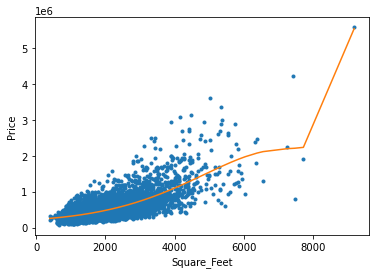

In [86]:
#plotting ridge4 on scatter plot
plt.plot(subset2['power_1'],y2,'.',
        subset2['power_1'], y2_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [89]:
#Using ridgeCV to select the best value for 15th order polynomial model, set3

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(target3, y3)  #using x and y same, we defined for 15th order polynomial
ridgecv.alpha_

0.01

#### Fitting 15th order polynomial model on set 3, with l2 penalty = 0.01

In [90]:
subset3 = polynomial_dataframe(set3['sqft_living'], 15)
subset3['price'] = set3['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target3 = subset3.drop(['price'], axis = 1)
y3 = subset3[['price']]

#Builiding our model
ridge3 = Ridge(alpha = 0.01, normalize=True) #using l2penalty as value of alpha
ridge3.fit(target3, y3) #fitting the model
print("Coefficients are:", ridge3.coef_)  #printing coefficients of model

#predicting using ridge4
y3_pred = ridge3.predict(target3)

Coefficients are: [[ 7.25407383e+01  2.55462583e-02  3.01452556e-06  8.15143378e-11
  -1.23156661e-14 -1.92322898e-18 -1.73911040e-22 -1.21500173e-26
  -6.23070130e-31 -6.34578789e-36  4.40855604e-39  8.94273163e-43
   1.30759531e-46  1.69067653e-50  2.05065355e-54]]


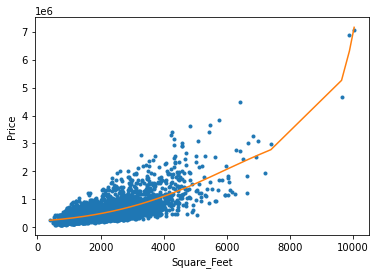

In [91]:
#plotting ridge4 on scatter plot
plt.plot(subset3['power_1'],y3,'.',
        subset3['power_1'], y3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

In [92]:
#Using ridgeCV to select the best value for 15th order polynomial model, set4

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(target4, y4)  #using x and y same, we defined for 15th order polynomial
ridgecv.alpha_

0.12328467394420634

#### Fitting 15th order polynomial model on set 4, with l2 penalty = 0.12328467394420634

In [93]:
subset4 = polynomial_dataframe(set4['sqft_living'], 15)
subset4['price'] = set4['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target4 = subset4.drop(['price'], axis = 1)
y4 = subset4[['price']]

#Builiding our model
ridge4 = Ridge(alpha = 0.12328467394420634, normalize=True) #using l2penalty as value of alpha
ridge4.fit(target4, y4) #fitting the model
print("Coefficients are:", ridge4.coef_)  #printing coefficients of model

#predicting using ridge4
y4_pred = ridge4.predict(target4)


Coefficients are: [[ 9.07249577e+01  1.66422253e-02  2.49861727e-06  2.45657229e-10
   1.27177730e-14 -4.15927515e-19 -1.93389321e-22 -2.92634356e-26
  -3.26183830e-30 -2.91463177e-34 -1.90261078e-38 -2.61073198e-43
   1.96713903e-46  4.73427540e-50  7.98669466e-54]]


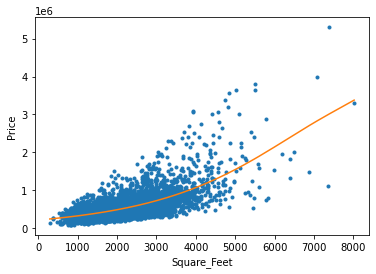

In [94]:
#plotting ridge4 on scatter plot
plt.plot(subset4['power_1'],y4,'.',
        subset4['power_1'], y4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html